In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

df = pd.read_excel('huatu.xlsx', header=0)
df = df.drop(0)


In [3]:

y1 = df.iloc[:, 0]
y2 = df.iloc[:, 1]
hv = df.iloc[:, 2]

y1_new = df.iloc[:, 4]
y2_new = df.iloc[:, 5]
hv_new = df.iloc[:, 8]

y1_var = df.iloc[:, 6]
y2_var = df.iloc[:, 7]

y1_new = y1_new.values[~np.isnan(y1_new.values)]
y2_new = y2_new .values[~np.isnan(y2_new.values)]
hv_new = hv_new.values[~np.isnan(hv_new.values)]

y1_var = y1_var.values[~np.isnan(y1_var.values)]
y2_var = y2_var.values[~np.isnan(y2_var.values)]


ref_point = [ 0.1895, -3.0066]

<function matplotlib.pyplot.show(close=None, block=None)>

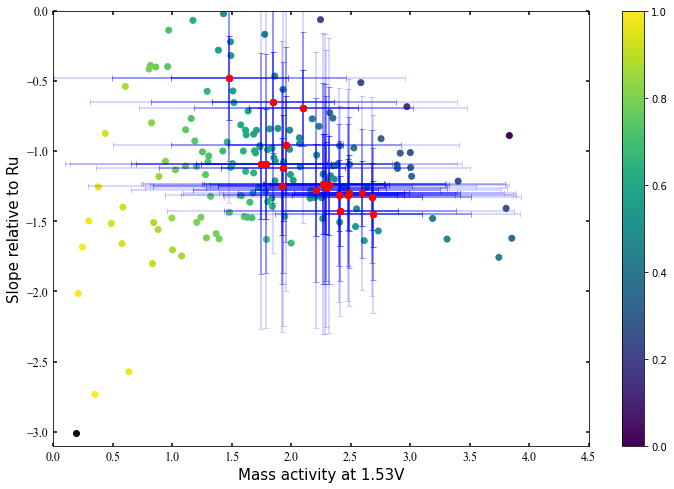

In [4]:
plt.figure(figsize=(12, 8))


plt.scatter(ref_point[0], ref_point[1], color='black')

plt.xlim(0, 4.5)
plt.xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5], fontsize=15, fontname='Times New Roman')
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True, direction='in', width=1.5, labelsize=12, pad=5)


plt.ylim(-3.1, 0)
plt.yticks([-3, -2.5, -2, -1.5, -1, -0.5, 0], fontsize=15, fontname='Times New Roman')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, direction='in', width=1.5, labelsize=12, pad=5)



plt.scatter(y1, y2, c=hv, cmap='viridis_r')
plt.scatter(y1_new, y2_new,color='red')

plt.errorbar(y1_new,y2_new, xerr= np.sqrt(y1_var) , yerr= np.sqrt(y2_var) , fmt='o', color='red', ecolor=(0, 0, 1, 0.6), capsize=3)
plt.errorbar(y1_new,y2_new, xerr= 2* np.sqrt(y1_var) , yerr= 2* np.sqrt(y2_var) , fmt='o', color='red', ecolor=(0, 0, 1, 0.4), capsize=3)
plt.errorbar(y1_new,y2_new, xerr= 3* np.sqrt(y1_var) , yerr= 3* np.sqrt(y2_var) , fmt='o', color='red', ecolor=(0, 0, 1, 0.2), capsize=3)


# plt.fill_between(y1_new[0],
#                  y2_new[0] + np.sqrt(y2_var)[0],
#                  y2_new[0] - np.sqrt(y2_var)[0], color="C0", alpha=0.6)



plt.colorbar()


plt.xlabel('Mass activity at 1.53V',fontsize=15)
plt.ylabel('Slope relative to Ru', fontsize=15)
# plt.title('Scatter Plot')


plt.show

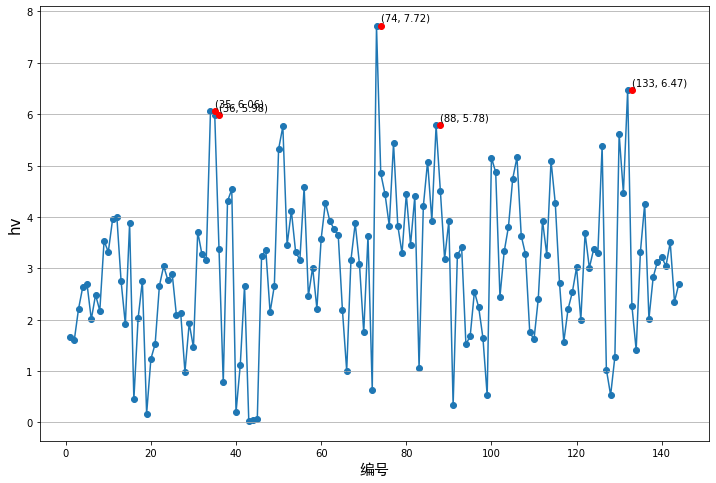

In [25]:
plt.figure(figsize=(12, 8))


plt.scatter(df.index, hv, marker='o')
plt.xlabel('编号', fontproperties='SimHei',fontsize=15)
plt.ylabel('hv',fontsize=15)

plt.plot(df.index, hv)

index = np.argsort(hv)[-5:]



for i in index:
    

    plt.plot(df.index[i+1], hv[i+1], marker='o', c='r')
    plt.annotate('({:.0f}, {:.2f})'.format(df.index[i+1], hv[i+1]), (df.index[i+1], hv[i+1]+0.1))
   


plt.grid(True, axis='y')

plt.show()